# Custom training loop

In [89]:
import tensorflow as tf
import numpy as np
import random

#### model

In [60]:
class Model():
    def __init__(self):
        self.w=tf.Variable(random.random())
        self.b=tf.Variable(0.0)
    def __call__(self,x):
        return self.w*x+self.b

In [79]:
model=Model()
model(5)

<tf.Tensor: shape=(), dtype=float32, numpy=0.55036986>

In [140]:
true_w=3.0
true_b=2.0
NUM_EXAMPLES=1000

In [141]:
x=tf.random.normal(shape=[NUM_EXAMPLES])

In [142]:
y=(true_w)*x+true_b

#### loss

$$Loss = \sum_{i} \left (y_{pred}^i - y_{target}^i \right )^2$$

In [143]:
def loss(y_true,y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

#### train

In [151]:
def train(model,x,y,lr):
    with tf.GradientTape() as tape:
        current_loss=loss(y,model(x))
    dw,db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(lr*dw)
    model.b.assign_sub(lr*db)
    return current_loss,model.w.numpy(),model.b.numpy()

#### training loop

In [152]:
model=Model()
lr=0.001
loss_history=[]
w_history=[]
b_history=[]
epochs=2000

for _ in range(epochs):
    current_loss,w,b=train(model,x,y,lr)
    loss_history.append(current_loss)
    w_history.append(w)
    b_history.append(b)

In [137]:
import matplotlib.pyplot as plt

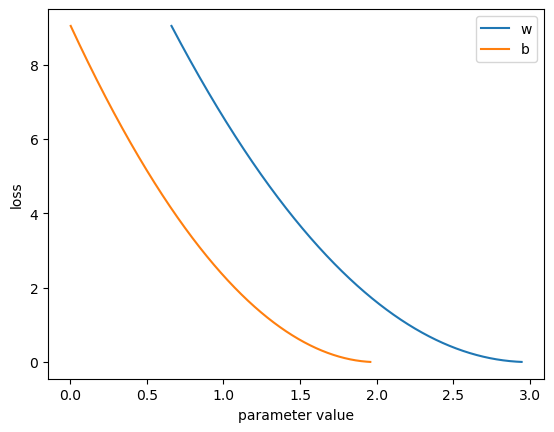

In [153]:
plt.plot(w_history,loss_history,label='w')
plt.plot(b_history,loss_history,label='b')
plt.xlabel('parameter value')
plt.ylabel('loss')
plt.legend()

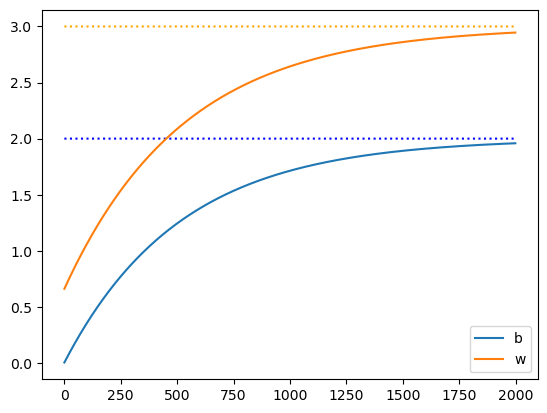

In [154]:
plt.plot(b_history,label='b')
x1=np.arange(0,epochs,1)
y1=0*x1+2
plt.plot(x1,y1,linestyle=':',color='blue')

plt.plot(w_history,label='w')
x2=np.arange(0,epochs,1)
y2=0*x2+3
plt.plot(x2,y2,linestyle=':',color='orange')

plt.legend()

---

# Custrom training with tensroflow

In [165]:
import tensorflow as tf
import tensorflow_datasets as tfds

#### data

In [232]:
data_train=tfds.load('fashion_mnist', split='train')
data_test=tfds.load('fashion_mnist', split='test')

In [233]:
classes=['tshirt','pants','pullover shirt','dress','coat','sandal','shirt','sneaker','bag','boot']

In [234]:
def format_image(data):
    img=data['image']
    img=tf.reshape(img, [-1])
    img=tf.cast(img, 'float32')
    img=img/255
    return img, data['label']

In [235]:
data_train=data_train.map(format_image)
data_test=data_test.map(format_image)

In [236]:
BATCH_SIZE=64
data_train=data_train.shuffle(buffer_size=1024).batch(BATCH_SIZE)
data_test=data_test.batch(BATCH_SIZE)

#### model

In [237]:
def my_model():
    inputs=tf.keras.Input(shape=(784,))
    x=tf.keras.layers.Dense(64, activation='relu')(inputs)
    x=tf.keras.layers.Dense(64, activation='relu')(x)
    outputs=tf.keras.layers.Dense(10, activation='softmax')(x)
    model=tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

#### loss & optimizer

In [238]:
loss=tf.keras.losses.SparseCategoricalCrossentropy()
optimizer=tf.keras.optimizers.Adam()

#### metrics

In [239]:
train_acc_metric=tf.keras.metrics.SparseCategoricalAccuracy()
val_acc_metric=tf.keras.metrics.SparseCategoricalAccuracy()

#### training loop

In [240]:
def gradient(optimizer,model,x,y):
    with tf.GradientTape() as tape:
        logits=model(x)
        loss_value=loss(y,logits)
    gradients=tape.gradient(loss_value,model.trainable_weights)
    optimizer.apply_gradients(zip(gradients,model.trainable_weights))
    return logits, loss_value

In [241]:
def train():
    losses=[]
    for step, (x_batch_train, y_batch_train) in enumerate(data_train):
        logits, loss = gradient(optimizer,model,x_batch_train, y_batch_train)
        losses.append(loss)
        train_acc_metric(y_batch_train, logits)
    return losses

In [242]:
def validation():
    losses=[]
    for x_val,y_val in data_test:
        val_logits=model(x_val)
        val_loss=loss(y_val,val_logits)
        losses.append(val_loss)
        val_acc_metric(y_val,val_logits)
    return losses

In [245]:
model=my_model()
EPOCHS=5
val_losses, train_losses = [],[]

for epoch in range(EPOCHS):
    print(f'Start of epoch {epoch}')
    
    epoch_losses=train()
    train_acc=train_acc_metric.result()
    
    epoch_val_losses=validation()
    val_acc=val_acc_metric.result()
    
    loss_mean=np.mean(epoch_losses)
    loss_val_mean=np.mean(epoch_val_losses)
    
    train_losses.append(loss_mean)
    val_losses.append(loss_val)
    print(f'Epoch: {epoch}, Loss: {loss_mean}, Validation Loss: {loss_val_mean}, Validation acc: {val_acc}')

Start of epoch 0
Epoch: 0, Loss: 0.48476114869117737, Validation Loss: 0.40976351499557495, Validation acc: 0.8653272986412048
Start of epoch 1
Epoch: 1, Loss: 0.3656446039676666, Validation Loss: 0.41078341007232666, Validation acc: 0.8645250201225281
Start of epoch 2
Epoch: 2, Loss: 0.337443470954895, Validation Loss: 0.37888434529304504, Validation acc: 0.8646307587623596
Start of epoch 3
Epoch: 3, Loss: 0.3187073767185211, Validation Loss: 0.3701467216014862, Validation acc: 0.8650571703910828
Start of epoch 4
Epoch: 4, Loss: 0.3035215139389038, Validation Loss: 0.35141992568969727, Validation acc: 0.8658533096313477
